# SOLVING HEAT EQUATION USING NEURAL NETWORKS

Related Research Papers
1. https://www.ejpam.com/index.php/ejpam/article/view/590

## Introduction

Let $\Omega$ be a nonempty, bounded, open, and connected domain in $\mathbb{R}^n$ with a smooth boundary $\Gamma$. Consider the time interval $(0, \tau)$ and the sets $Q = \Omega \times (0, \tau)$ and $\Sigma = \Gamma \times (0, \tau)$. The controlled semilinear heat equation, with boundary control, in $Q$ is:

\begin{equation}
    \begin{aligned}
        \frac{\partial \omega(x, t)}{\partial t} &= c^2 \Delta \omega(x, t) + \phi(t, \omega(x, t)); \quad \text{in } Q \\
        \omega(x, 0) &= \omega_0; \quad \text{in } \Omega \\
        \omega &= C(\sigma, t); \quad \text{on } \Gamma
    \end{aligned}
    \tag{1}
\end{equation}

where, $\omega(x, t)$ denotes the temperature at $x \in \Omega$ and $t \in [0, \tau]$, $\Delta$ denotes the Laplace operator, $\phi$ is a linear or nonlinear operator, and $c$ is a real constant. $C(\sigma, t)$ represents the boundary control function, where $\sigma$ is the boundary variable. Control function $ \sigma $ being boundary variable.

Now the Problem is to find a boundary control function $ C $ on $ \Gamma $ such that the solution $ \omega $ satisfies $ \omega(x,\tau) = \omega_\tau $ on $ \Omega $, where $ \omega_\tau $ is any final required temperature.



## Example Problem

Consider the controlled linear two-dimensional heat equation
\begin{equation}
    \frac{\partial \omega(x, y, t)}{\partial t} = \nu \frac{\partial^2 \omega(x, y, t)}{\partial x^2} + \frac{\partial^2 \omega(x, y, t)}{\partial y^2} + 3\pi^3 \nu \exp(2\pi^2 \nu t)(\sin(\pi x) + \sin(\pi y))
    \tag{2a}
\end{equation}

Let
\begin{equation}
    f(x,y,t) := 3\pi^3 \nu \exp(2\pi^2 \nu t)(\sin(\pi x) + \sin(\pi y))
    \tag{2b}
\end{equation}



with initial condition
\begin{equation}
    \omega(x, y, 0) = \pi (\sin(\pi x) + \sin(\pi y))
    \tag{3}
\end{equation}

where $ t \in (0,1), v = \frac{1}{2\pi^2} $ and $ (x,y) \in \Omega = (0,1) \times (0,1)$

On Unit Square Boundary,

\begin{equation}
   \begin{aligned}
        \Gamma = \{ &y = 0, \ 0 \leq x \leq 1;\\  &x = 1, \ 0 \leq y \leq 1; \\ &y = 1, \ 0 \leq x \leq 1; \\ &x = 0, \ 0 \leq y \leq 1 \}
   \end{aligned}
    \tag{4}
\end{equation}

Now the problem is to find the unknown control functions $ g, h, m,$ and $ n $ defined on the given boundary as

\begin{equation}
    \begin{aligned}
        \omega(0, y, t) &= g(y, t) \\
        \omega(x, 0, t) &= h(x, t) \\
        \omega(1, y, t) &= m(y, t) \\
        \omega(x, 1, t) &= n(x, t) \\
    \end{aligned}
    \tag{5}
\end{equation}

such that at the final time $t = 1$ the solution $ \omega(x, y, t) $ satisfies

\begin{equation}
    \omega(x, y, 1) = \pi \exp(2\pi^2 \nu)(\sin(\pi x) + \sin(\pi y))
    \tag{6}
\end{equation}

So Neural Network Approximation of Boundary Functions are:

\begin{equation}
    \begin{aligned}
        g(y, t) &= [1 - t + t \exp(2\pi^2 \nu)]\pi \sin(\pi y) + t(1 - t)[y(1 - y) N_g + (1 - y) N_1 + y N_2] \\ 
        h(x, t) &= [1 - t + t \exp(2\pi^2 \nu)]\pi \sin(\pi x) + t(1 - t)[x(1 - x) N_h + (1 - x) N_1 + x N_3] \\
        m(y, t) &= [1 - t + t \exp(2\pi^2 \nu)]\pi \sin(\pi y) + t(1 - t)[y(1 - y) N_m + (1 - y) N_3 + y N_4] \\
        n(x, t) &= [1 - t + t \exp(2\pi^2 \nu)]\pi \sin(\pi x) + t(1 - t)[x(1 - x) N_n + (1 - x) N_2 + x N_4] \\

    \end{aligned}
    \tag{7}
\end{equation}


Trial Solution Satisfying All Conditions:

\begin{equation}
    \begin{aligned}
        \omega_{\text{tr}}(x, y, t) =   &[1 - t + t \exp(2\pi^2 \nu)]\pi (\sin(\pi x) +  \sin(\pi y)) + t(1 - t)[(1 - x)y(1 - y)N_g \\ 
                                        &+ (1 - y)x(1 - x)N_h + x y(1 - y)N_m    + y x(1 - x)N_n + (1 - x)(1 - y)N_1 \\ 
                                        &+ y(1 - x)N_2 + x(1 - y)N_3 + x y N_4] + t (1 - t)x(1 - x)y(1 - y)N_{\omega}
    \end{aligned}
    \tag{8}
\end{equation}

Error Function to Minimize:

\begin{equation}
    \begin{aligned}
        E = \sum_{i}\sum_{j}\sum_{k} \left[ \frac{\partial \omega_{\text{tr}}(x_i, y_j, t_k)}{\partial t} - \nu \left\{ \frac{\partial^2 \omega_{\text{tr}}(x_i, y_j, t_k)}{\partial x^2} + \frac{\partial^2 \omega_{\text{tr}}(x_i, y_j, t_k)}{\partial y^2} \right\} - 3\pi^3 \nu \exp(2\pi^2 \nu t_k)(\sin(\pi x_i) + \sin(\pi y_j)) \right]^2

    \end{aligned}
    \tag{9}
\end{equation}

Analytical Solution is:

\begin{equation}
    \omega(x,y,t) = \pi \exp(2\pi^2\nu t)(sin(\pi x) + sin(\pi y))
    \tag{9}
\end{equation}


## CODE

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline
from tqdm import tqdm
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")
from matplotlib import rcParams

rcParams.update({"figure.autolayout": True})

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
x = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)
y = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)
t = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)

x_mesh, y_mesh, t_mesh = torch.meshgrid(
    x.squeeze(), y.squeeze(), t.squeeze(), indexing="ij"
)
print(x_mesh.shape)
print(y_mesh.shape)
print(t_mesh.shape)

torch.Size([10, 10, 10])
torch.Size([10, 10, 10])
torch.Size([10, 10, 10])


In [4]:
X_flat = x_mesh.reshape(-1, 1)
Y_flat = y_mesh.reshape(-1, 1)
T_flat = t_mesh.reshape(-1, 1)

Z = torch.cat((X_flat, Y_flat, T_flat), dim=1)
print(Z.shape)
print(Z[0:10])

torch.Size([1000, 3])
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1111],
        [0.0000, 0.0000, 0.2222],
        [0.0000, 0.0000, 0.3333],
        [0.0000, 0.0000, 0.4444],
        [0.0000, 0.0000, 0.5556],
        [0.0000, 0.0000, 0.6667],
        [0.0000, 0.0000, 0.7778],
        [0.0000, 0.0000, 0.8889],
        [0.0000, 0.0000, 1.0000]], device='cuda:0')


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Hidden_layer = nn.Linear(in_features=3, out_features=10)
        self.Output_layer = nn.Linear(in_features=10, out_features=1)
        self.Sigmoid = nn.Sigmoid()

    def forward(self, x, y, t):
        inputs = torch.cat((x, y, t), dim=1)
        return self.Output_layer(self.Sigmoid(self.Hidden_layer(inputs)))

In [6]:
NeuralNetwork()

NeuralNetwork(
  (Hidden_layer): Linear(in_features=3, out_features=10, bias=True)
  (Output_layer): Linear(in_features=10, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [7]:
class LSTM_Network(nn.Module):
    def __init__(self):
        super().__init__()
        # LSTM now accepts input_size=3 since we have three features (x, y, t)
        self.lstm = nn.LSTM(
            input_size=3, hidden_size=10, num_layers=2, batch_first=True
        )
        # Final output layer, similar to your feedforward version (includes bias)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x, y, t):
        # Concatenate x, y, t along the feature dimension.
        # Assume x, y, t each have shape (batch, 1) so that the concatenated
        # tensor has shape (batch, 3)
        inputs = torch.cat((x, y, t), dim=1).to(device=device)  # shape: (batch, 3)

        # Unsqueeze to add a sequence dimension, resulting in shape (batch, 1, 3)
        inputs = inputs.unsqueeze(1)

        # Process the sequence through the LSTM.
        lstm_out, _ = self.lstm(inputs)  # lstm_out has shape: (batch, 1, 10)

        # Map the hidden state to the output
        output = self.output_layer(lstm_out)  # shape: (batch, 1, 1)
        # output = lstm_out

        # Remove the sequence dimension to obtain shape (batch, 1)
        return output.squeeze(1)

In [8]:
LSTM_Network()

LSTM_Network(
  (lstm): LSTM(3, 10, num_layers=2, batch_first=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)

In [9]:
# def f(x,y):
#     pi = torch.pi
#     pi = torch.tensor(pi, dtype=torch.float32)
#     nu = 1 / (2 * pi ** 2)
#     return  3 * (pi ** 3) * nu * torch.exp(2 * (pi ** 2) * nu * t) * (torch.sin(pi * x) + torch.sin(pi * y))


def g(y, t, N_g, N_1, N_2):
    device = y.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    zero = torch.zeros_like(y)
    term1 = (1 - t + t * torch.exp(2 * pi**2 * nu)) * pi * torch.sin(pi * y)
    term2 = (
        t
        * (1 - t)
        * (
            y * (1 - y) * N_g(zero, y, t)
            + (1 - y) * N_1(zero, zero, t)
            + y * N_2(zero, zero, t)
        )
    )
    return term1 + term2


def h(x, t, N_h, N_1, N_3):
    device = x.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    zero = torch.zeros_like(x)
    term1 = (1 - t + t * torch.exp(2 * pi**2 * nu)) * pi * torch.sin(pi * x)
    term2 = (
        t
        * (1 - t)
        * (
            x * (1 - x) * N_h(x, zero, t)
            + (1 - x) * N_1(zero, zero, t)
            + x * N_3(zero, zero, t)
        )
    )
    return term1 + term2


def m(y, t, N_m, N_3, N_4):
    device = y.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    one = torch.ones_like(y)
    zero = torch.zeros_like(y)
    term1 = (1 - t + t * torch.exp(2 * pi**2 * nu)) * pi * torch.sin(pi * y)
    term2 = (
        t
        * (1 - t)
        * (
            y * (1 - y) * N_m(one, y, t)
            + (1 - y) * N_3(zero, zero, t)
            + y * N_4(zero, zero, t)
        )
    )
    return term1 + term2


def n(x, t, N_n, N_2, N_4):
    device = x.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    one = torch.ones_like(x)
    zero = torch.zeros_like(x)
    term1 = (1 - t + t * torch.exp(2 * pi**2 * nu)) * pi * torch.sin(pi * x)
    term2 = (
        t
        * (1 - t)
        * (
            x * (1 - x) * N_n(x, one, t)
            + (1 - x) * N_2(zero, zero, t)
            + x * N_4(zero, zero, t)
        )
    )
    return term1 + term2


def omega_tr(x, y, t, N_g, N_h, N_m, N_n, N_1, N_2, N_3, N_4, N_omega):
    # First term

    device = x.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    zero = torch.zeros_like(x)
    one = torch.ones_like(x)

    term1 = (
        ((1 - t) + t * torch.exp(2 * (pi**2) * nu))
        * pi
        * (torch.sin(pi * x) + torch.sin(pi * y))
    )

    # Second term
    term2 = (
        t
        * (1 - t)
        * (
            (1 - x) * y * (1 - y) * N_g(zero, y, t)
            + (1 - y) * x * (1 - x) * N_h(x, zero, t)
            + x * y * (1 - y) * N_m(one, y, t)
            + y * x * (1 - x) * N_n(x, one, t)
            + (1 - x) * (1 - y) * N_1(zero, zero, t)
            + y * (1 - x) * N_2(zero, zero, t)
            + x * (1 - y) * N_3(zero, zero, t)
            + x * y * N_4(zero, zero, t)
        )
    )

    # Third term
    term3 = t * (1 - t) * x * (1 - x) * y * (1 - y) * N_omega(x, y, t)

    # Combine all terms
    return term1 + term2 + term3


def omega_exact(x, y, t):
    device = x.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    return pi * torch.exp(2 * pi**2 * nu * t) * (torch.sin(pi * x) + torch.sin(pi * y))


def loss_1(x, y, t, models):
    """
    Compute the loss function using multiple models (N_g, N_h, N_m, etc.)
    """
    device = x.device
    pi = torch.tensor(torch.pi, dtype=torch.float32, device=device)
    nu = 1 / (2 * pi**2)
    # Extract models from the dictionary
    N_g = models["N_g"]
    N_h = models["N_h"]
    N_m = models["N_m"]
    N_n = models["N_n"]
    N_1 = models["N_1"]
    N_2 = models["N_2"]
    N_3 = models["N_3"]
    N_4 = models["N_4"]
    N_omega = models["N_omega"]

    # Set requires_grad for variables
    x.requires_grad = True
    y.requires_grad = True
    t.requires_grad = True

    # Compute omega_tr using the provided function
    u = omega_tr(x, y, t, N_g, N_h, N_m, N_n, N_1, N_2, N_3, N_4, N_omega)

    # Compute first-order derivative with respect to time (∂ω/∂t)
    du_dt = torch.autograd.grad(
        u, t, grad_outputs=torch.ones_like(t), create_graph=True
    )[0]

    # Compute second-order derivatives with respect to x and y (∂²ω/∂x² and ∂²ω/∂y²)
    du_dx = torch.autograd.grad(
        u, x, grad_outputs=torch.ones_like(x), create_graph=True
    )[0]
    du_dy = torch.autograd.grad(
        u, y, grad_outputs=torch.ones_like(y), create_graph=True
    )[0]

    d2u_dx2 = torch.autograd.grad(
        du_dx, x, grad_outputs=torch.ones_like(x), create_graph=True
    )[0]
    d2u_dy2 = torch.autograd.grad(
        du_dy, y, grad_outputs=torch.ones_like(y), create_graph=True
    )[0]

    # Compute the Laplacian term (∂²ω/∂x² + ∂²ω/∂y²)
    grad_2 = d2u_dx2 + d2u_dy2

    # Compute the time-dependent exponential term and sinusoidal terms
    sin_terms = torch.sin(pi * x) + torch.sin(pi * y)
    time_term = 3 * pi**3 * nu * torch.exp(2 * pi**2 * nu * t) * sin_terms

    # Compute the difference from the equation
    diff = du_dt - nu * grad_2 - time_term

    # Return the sum of squared differences as the loss
    return torch.sum(diff**2)


In [10]:
# plot function
def Plot_controls(X, Y, T, models):
    N_g = models["N_g"]
    N_h = models["N_h"]
    N_m = models["N_m"]
    N_n = models["N_n"]
    N_1 = models["N_1"]
    N_2 = models["N_2"]
    N_3 = models["N_3"]
    N_4 = models["N_4"]
    N_omega = models["N_omega"]

    # u_pred = omega_tr(X, Y, T, N_g, N_h, N_m, N_n, N_1, N_2, N_3, N_4, N_omega)
    g_pred = g(Y, T, N_g, N_1, N_2)
    h_pred = h(X, T, N_h, N_1, N_3)
    m_pred = m(Y, T, N_m, N_3, N_4)
    n_pred = n(X, T, N_n, N_2, N_4)

    zero = torch.zeros_like(X)
    one = torch.ones_like(X)

    g_exact = omega_exact(zero, Y, T).reshape(10, 10).detach().cpu().numpy()
    h_exact = omega_exact(X, zero, T).reshape(10, 10).detach().cpu().numpy()
    m_exact = omega_exact(one, Y, T).reshape(10, 10).detach().cpu().numpy()
    n_exact = omega_exact(X, one, T).reshape(10, 10).detach().cpu().numpy()

    x = X.reshape(10, 10).detach().cpu().numpy()
    y = Y.reshape(10, 10).detach().cpu().numpy()
    t = T.reshape(10, 10).detach().cpu().numpy()

    g_pred = g_pred.reshape(10, 10).detach().cpu().numpy()
    h_pred = h_pred.reshape(10, 10).detach().cpu().numpy()
    m_pred = m_pred.reshape(10, 10).detach().cpu().numpy()
    n_pred = n_pred.reshape(10, 10).detach().cpu().numpy()

    # Create a figure with 2 subplots (1 row, 2 columns)
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        2, 2, figsize=(10, 8), subplot_kw={"projection": "3d"}
    )
    # fig, ax2 = plt.subplots(figsize=(12, 6), subplot_kw={'projection': '3d'})

    import matplotlib.ticker as ticker

    for row in [ax1, ax2], [ax3, ax4]:
        for ax in row:
            ax.zaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
            ax.zaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
            ax.tick_params(axis="z", pad=12)

    # --- Subplot 1: Exact Solution ---
    # ax1.plot_surface(y, t, u_pred, cmap='viridis', edgecolor='none')
    # ax1.set_title('Exact Solution')
    # ax1.set_xlabel('X')
    # ax1.set_ylabel('Y')
    # ax1.set_zlabel('U_exact')
    # ax1.set_yticks(np.linspace(np.min(y), np.max(y), num=3))
    # ax1.set_xticks(np.linspace(np.min(x), np.max(x), num=3))
    # ax1.set_zticks(np.linspace(np.min(U_exact), np.max(U_exact), num=5))
    # ax1.set_box_aspect(None, zoom=0.85)  # Adjust the aspect ratio

    # --- Subplot 2: Deviation Plot (Predicted - Exact) ---

    ################ Plot Of Deviation of g ################
    g_deviation = g_pred - g_exact
    z_min = np.min(g_deviation)
    z_max = np.max(g_deviation)

    # ax1.plot_wireframe( y,t, deviation)
    ax1.plot_surface(y, t, g_deviation, cmap="coolwarm", edgecolor="none")
    ax1.set_title("Error at x = 0")
    ax1.set_xlabel("Y")
    ax1.set_ylabel("T")
    ax1.set_zlabel("Error", labelpad=25, rotation=90)

    ax1.set_zlim(z_min, z_max)
    ax1.set_xticks(np.linspace(np.min(y), np.max(y), num=5))
    ax1.set_yticks(np.linspace(np.min(t), np.max(t), num=5))
    ax1.set_zticks(np.linspace(z_min, z_max, num=5))

    # Rotate z-axis labels for better fit
    ax1.zaxis.set_rotate_label(False)
    ax1.set_box_aspect(None, zoom=0.85)  # Adjust the aspect ratio
    ax1.view_init(elev=30, azim=120)

    ############# Plot Of Deviation of h ###############
    h_deviation = h_pred - h_exact
    z_min = np.min(h_deviation)
    z_max = np.max(h_deviation)

    # ax2.plot_wireframe( y,t, deviation)
    ax2.plot_surface(x, t, h_deviation, cmap="coolwarm", edgecolor="none")
    ax2.set_title("Error at y = 0")
    ax2.set_xlabel("X")
    ax2.set_ylabel("T")
    ax2.set_zlabel("Error", labelpad=25, rotation=90)

    ax2.set_zlim(z_min, z_max)
    ax2.set_xticks(np.linspace(np.min(x), np.max(x), num=5))
    ax2.set_yticks(np.linspace(np.min(t), np.max(t), num=5))
    ax2.set_zticks(np.linspace(z_min, z_max, num=5))

    # Rotate z-axis labels for better fit
    ax2.zaxis.set_rotate_label(False)
    ax2.set_box_aspect(None, zoom=0.85)  # Adjust the aspect ratio
    ax2.view_init(elev=30, azim=120)

    ############# Plot Of Deviation of m ###############
    m_deviation = m_pred - m_exact
    z_min = np.min(m_deviation)
    z_max = np.max(m_deviation)

    # ax3.plot_wireframe( y,t, deviation)
    ax3.plot_surface(y, t, m_deviation, cmap="coolwarm", edgecolor="none")
    ax3.set_title("Error at x = 1")
    ax3.set_xlabel("Y")
    ax3.set_ylabel("T")
    ax3.set_zlabel("Error", labelpad=25, rotation=90)

    ax3.set_zlim(z_min, z_max)
    ax3.set_xticks(np.linspace(np.min(y), np.max(y), num=5))
    ax3.set_yticks(np.linspace(np.min(t), np.max(t), num=5))
    ax3.set_zticks(np.linspace(z_min, z_max, num=5))

    # Rotate z-axis labels for better fit
    ax3.zaxis.set_rotate_label(False)
    ax3.set_box_aspect(None, zoom=0.85)  # Adjust the aspect ratio
    ax3.view_init(elev=30, azim=120)

    ############# Plot Of Deviation of n ###############
    n_deviation = n_pred - n_exact
    z_min = np.min(n_deviation)
    z_max = np.max(n_deviation)

    # ax4.plot_wireframe( y,t, deviation)
    ax4.plot_surface(x, t, n_deviation, cmap="coolwarm", edgecolor="none")
    ax4.set_title("Error at y = 1")
    ax4.set_xlabel("X")
    ax4.set_ylabel("T")
    ax4.set_zlabel("Error", labelpad=25, rotation=90)

    ax4.set_zlim(z_min, z_max)
    ax4.set_xticks(np.linspace(np.min(x), np.max(x), num=5))
    ax4.set_yticks(np.linspace(np.min(t), np.max(t), num=5))
    ax4.set_zticks(np.linspace(z_min, z_max, num=5))

    # Rotate z-axis labels for better fit
    ax4.zaxis.set_rotate_label(False)
    ax4.set_box_aspect(None, zoom=0.85)  # Adjust the aspect ratio
    ax4.view_init(elev=30, azim=120)

    # Adjust layout
    fig.tight_layout(pad=10.0)
    # fig.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
    # fig.set_label("Difference between Exact and Computed Values of Control at Boundary")
    fig.suptitle(
        "Difference between Exact and Computed Values of Control at Boundary",
        fontsize=16,
        y=0.99,
    )
    plt.tight_layout()
    plt.show()


In [11]:
# MSE Calculations


def MSE_Calculate(xx, yy, t, models):
    N_g = models["N_g"]
    N_h = models["N_h"]
    N_m = models["N_m"]
    N_n = models["N_n"]
    N_1 = models["N_1"]
    N_2 = models["N_2"]
    N_3 = models["N_3"]
    N_4 = models["N_4"]
    N_omega = models["N_omega"]

    # Get the predicted omega from the model (using omega function with current time t)
    uu_pred = omega_tr(
        xx, yy, t, N_g, N_h, N_m, N_n, N_1, N_2, N_3, N_4, N_omega
    )  # This is the predicted omega(x, y, t)

    # Calculate the exact omega using the exact function (you would define this as needed)
    uu_exact = omega_exact(
        xx, yy, t
    )  # Assuming the exact omega is same as the model output for this example

    # Calculate Mean Squared Error
    mse = torch.mean((uu_pred - uu_exact) ** 2)

    # Print the MSE
    print(f"MSE: {mse.item()}")

    return mse


In [12]:
# Train function
def Optimize(x, y, t, epochs, models):
    # Flatten all model parameters into a single list of parameters for optimization
    all_params = [model.parameters() for model in models.values()]

    optimizer = torch.optim.LBFGS(
        [param for model_params in all_params for param in model_params]
    )

    # Training function
    def train():
        optimizer.zero_grad()

        # Pass all models (N_g, N_h, N_m, N_n, N_1, N_2, N_3, N_4, N_omega) into the loss function
        with torch.backends.cudnn.flags(enabled=False):
            loss = loss_1(x, y, t, models)  # Pass the models dictionary into loss_1
        loss.backward()
        return loss

    # Optimization loop
    for _ in tqdm(range(epochs)):
        optimizer.step(train)


In [13]:
EPOCHS = 15

# Create FCNN models
# N_g = NeuralNetwork().to(device=device)
# N_h = NeuralNetwork().to(device=device)
# N_m = NeuralNetwork().to(device=device)
# N_n = NeuralNetwork().to(device=device)
# N_1 = NeuralNetwork().to(device=device)
# N_2 = NeuralNetwork().to(device=device)
# N_3 = NeuralNetwork().to(device=device)
# N_4 = NeuralNetwork().to(device=device)
# N_omega = NeuralNetwork().to(device=device)

# Create LSTM models
N_g = LSTM_Network().to(device=device)
N_h = LSTM_Network().to(device=device)
N_m = LSTM_Network().to(device=device)
N_n = LSTM_Network().to(device=device)
N_1 = LSTM_Network().to(device=device)
N_2 = LSTM_Network().to(device=device)
N_3 = LSTM_Network().to(device=device)
N_4 = LSTM_Network().to(device=device)
N_omega = LSTM_Network().to(device=device)


models = {
    "N_g": N_g,
    "N_h": N_h,
    "N_m": N_m,
    "N_n": N_n,
    "N_1": N_1,
    "N_2": N_2,
    "N_3": N_3,
    "N_4": N_4,
    "N_omega": N_omega,
}

x = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)
y = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)
t = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)

x_mesh, y_mesh, t_mesh = torch.meshgrid(
    x.squeeze(), y.squeeze(), t.squeeze(), indexing="ij"
)

X_flat = x_mesh.reshape(-1, 1).to(device=device)
Y_flat = y_mesh.reshape(-1, 1).to(device=device)
T_flat = t_mesh.reshape(-1, 1).to(device=device)


# Assuming x, y, t are your input tensors
Optimize(X_flat, Y_flat, T_flat, epochs=EPOCHS, models=models)
MSE = MSE_Calculate(X_flat, Y_flat, T_flat, models)


100%|██████████| 15/15 [00:28<00:00,  1.89s/it]

MSE: 7.933503809454123e-08


In [14]:
MSE = MSE_Calculate(X_flat, Y_flat, T_flat, models)

MSE: 7.933503809454123e-08


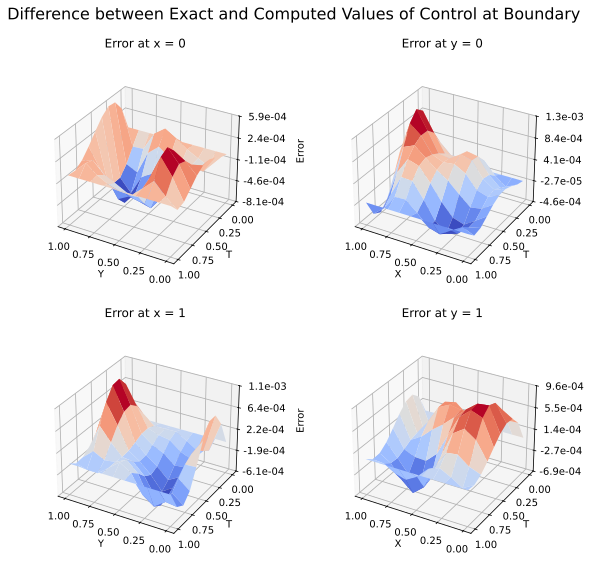

In [20]:
y1 = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)
x1 = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)
t1 = torch.linspace(0, 1, 10).unsqueeze(1).to(device=device)

y_mesh1, t_mesh1 = torch.meshgrid(y1.squeeze(), t1.squeeze(), indexing="ij")
x_mesh1, t_mesh1 = torch.meshgrid(x1.squeeze(), t1.squeeze(), indexing="ij")

Y_flat1 = y_mesh1.reshape(-1, 1)
X_flat1 = x_mesh1.reshape(-1, 1)
T_flat1 = t_mesh1.reshape(-1, 1)

# X_flat1 = torch.zeros_like(Y_flat1)


Plot_controls(X_flat1, Y_flat1, T_flat1, models)

In [16]:
inputs = torch.cat((X_flat, Y_flat, T_flat), dim=1).to(device=device)
print(X_flat.shape)
print(inputs.shape)
print(inputs.unsqueeze(1).shape)
print(inputs)
print(inputs.unsqueeze(1))

torch.Size([1000, 1])
torch.Size([1000, 3])
torch.Size([1000, 1, 3])
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1111],
        [0.0000, 0.0000, 0.2222],
        ...,
        [1.0000, 1.0000, 0.7778],
        [1.0000, 1.0000, 0.8889],
        [1.0000, 1.0000, 1.0000]], device='cuda:0', grad_fn=<CatBackward0>)
tensor([[[0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.1111]],

        [[0.0000, 0.0000, 0.2222]],

        ...,

        [[1.0000, 1.0000, 0.7778]],

        [[1.0000, 1.0000, 0.8889]],

        [[1.0000, 1.0000, 1.0000]]], device='cuda:0',
       grad_fn=<UnsqueezeBackward0>)


In [17]:
pi = torch.pi
pi = torch.tensor(pi, dtype=torch.float32)
nu = 1 / (2 * (pi**2))
# nu = torch.tensor(nu, dtype=torch.float32)


print(type(nu))
print(nu)
print(type(pi))
print(pi)

<class 'torch.Tensor'>
tensor(0.0507)
<class 'torch.Tensor'>
tensor(3.1416)
